# Домашняя работа №6

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [1]:
import io
import requests
import ssl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# url="http://yustiks.ru/dataset/creditcard.csv"
# dataset=pd.read_csv(url)
# dataset.head()

**1. Загрузить датасет**

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context
# url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
print('Количество отсутствующих значений (NaN):', dataset.isnull().sum().sum())

Количество отсутствующих значений (NaN): 0


**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [4]:
# Выделим классы и количество к ним относящихся операций

credit_class = list(dataset.Class.unique())
credit_calss_volume = [len(dataset.Class[dataset.Class == credit_class[0]]),
                       len(dataset.Class[dataset.Class == credit_class[1]])]
credit_class, credit_calss_volume

([0, 1], [284315, 492])

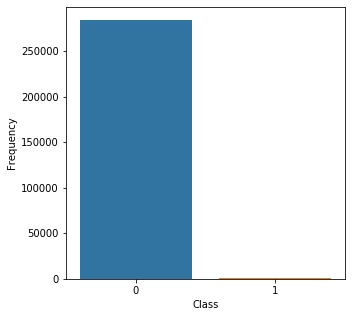

In [5]:
# Построим barplot на их основании

f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x=credit_class, y=credit_calss_volume)

plt.xlabel('Class')
plt.ylabel('Frequency')
# plt.title('Title')
# plt.legend()
plt.show()

In [6]:
print(f'Количество честных сделок: {len(dataset.Class[dataset.Class == 0])}')
print(f'Количество обманных сделок: {len(dataset.Class[dataset.Class == 1])}')

Количество честных сделок: 284315
Количество обманных сделок: 492


**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

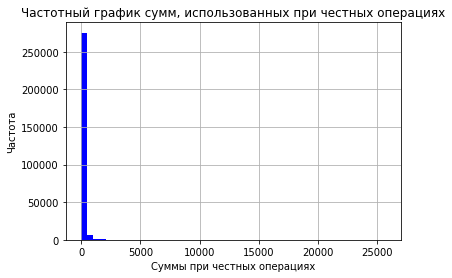

In [7]:
plt.hist(dataset.Amount[dataset.Class == 0], 50, color='b')
# или
# sns.distplot(dataset.Amount[dataset.Class == 0], kde = False)

plt.xlabel('Суммы при честных операциях')
plt.ylabel('Частота')
plt.title('Частотный график сумм, использованных при честных операциях')
plt.grid(True)
plt.show()

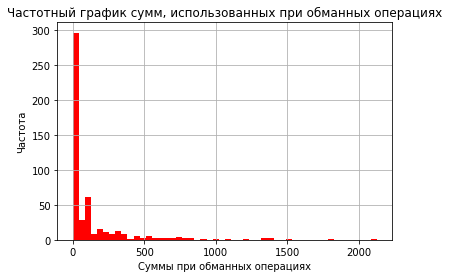

In [8]:
plt.hist(dataset.Amount[dataset.Class == 1], 50, color='r')
# или
# sns.distplot(dataset.Amount[dataset.Class == 1], kde = False)

plt.xlabel('Суммы при обманных операциях')
plt.ylabel('Частота')
plt.title('Частотный график сумм, использованных при обманных операциях')
plt.grid(True)
plt.show()

**5. Построить графики histograms для всех значений**

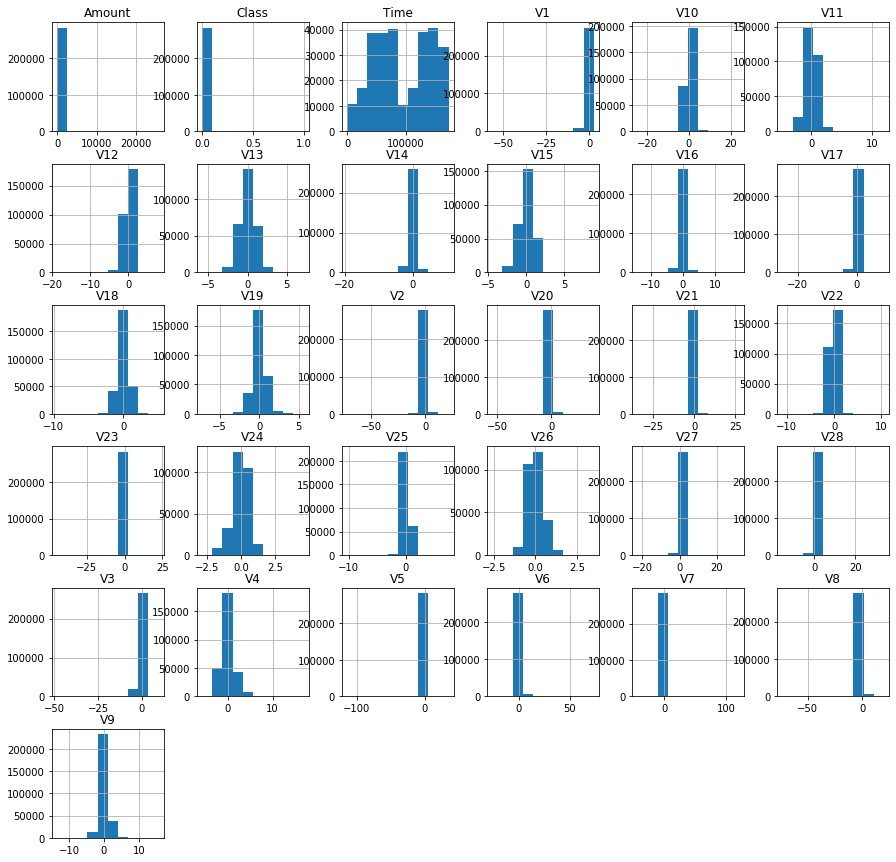

In [9]:
dataset.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

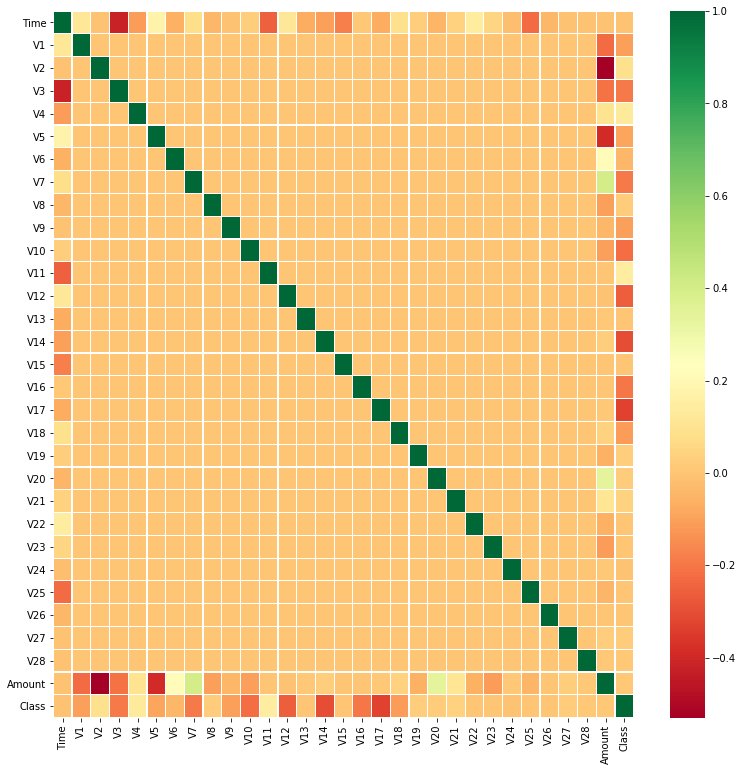

In [10]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(dataset.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

# sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
# fig=plt.gcf()
# fig.set_size_inches(20,20)
# plt.show()

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

Модель Random Forest

In [11]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# model=RandomForestClassifier(n_estimators=100)

# обучаем модель
# model.fit(X_train_22,y_train_22)

In [12]:
# Отделяем атрибуты от классов

output_y = dataset.iloc[:,30:]
input_x = dataset.iloc[:,:30]

In [13]:
# Тут уже ровным счетом ничего не понятно, кроме того, что мы считаем количество обманных (класс 1) операций
# Что делает LabelEncoder? Что такое idxmax(1)? Что происходит здесь le.fit_transform(targets)?

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
targets=(output_y.iloc[:,:]==1).idxmax(1)
Y=le.fit_transform(targets)
print(targets.value_counts())

Class    284807
dtype: int64


In [14]:
# Разделим данные на 70% тренировочных и на 30% тестовых

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    input_x,
    Y,
    test_size = 0.3
)

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Создаем модель деревья решений и выбираем 100 деревьев в качестве параметра

model=RandomForestClassifier(n_estimators=100)

# Обучаем модель

model.fit(X_train, y_train)

RandomForestClassifier()

Как делать classification report:

In [16]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85443

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.00      1.00     85443



1.0

In [17]:
# Где ошибка? Почему 1.0?

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

In [18]:
# Составим датасет только из атрибутов без колонки класса

dataset_attributes = dataset.iloc[:,:30]
dataset_attributes.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [19]:
# Выделим наименования столбцов в отдельный список

headers = list(dataset_attributes.columns.values)

In [20]:
# Нормализуем параметры

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
np_scaled = min_max_scaler.fit_transform(dataset_attributes)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.165884,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.159060,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.171710,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.156100,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.169231,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551


In [21]:
# Восстановим наименования столбцов, которые стерлись при нормализации

df_norm.columns = headers
df_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.165884,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.159060,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.171710,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.156100,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.169231,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551


In [22]:
output_y = dataset.iloc[:,30:]
input_x = df_norm

In [23]:
le=LabelEncoder()
targets=(output_y.iloc[:,:]==1).idxmax(1)
Y=le.fit_transform(targets)
print(targets.value_counts())

Class    284807
dtype: int64


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    input_x,
    Y,
    test_size = 0.3
)

In [25]:
# Создаем модель деревья решений и выбираем 100 деревьев в качестве параметра

model=RandomForestClassifier(n_estimators=100)

# Обучаем модель

model.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85443

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.00      1.00     85443



1.0

In [27]:
# Опять 1.0...

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_norm,
                                                 Y,
                                                 test_size = 0.3,
                                                 random_state = 3)

In [29]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled))

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [ ]:
# Что не так?!

**Уважаемые преподаватели, убедительная просьба уделять в разы больше времени коду. Разбирать каждую строчку. Если не успеваете во время лекции, делайте, пожалуйста, комментарии прямо в ноутбуке до лекции. Так будет удобнее для всех. В Слаке толком ни на один вопрос не отвечают. В коде гораздо больше непонятных моментов, нежели в голой теории. На одну непонятную строчку при выполнении домашнего задания и анализа лекции может уходить больше часа в поисках логики на просторах интернета. Дело доходит до того, что одно домашнее задание выполняется 15-16 часов чистого времени. Это без учета лекции, которую нужно смотреть 4 часа в записи с остановками, чтобы что-то понять. Итого 40 часов в неделю, вместо заявленных в начале курса 10 часов. Это не критика, но раздел "Статистика" превратился в каждодневный кошмар и круглосуточный непрерывный поиск в Google. Это неправильно. С этим надо что-то делать.  
Резюме: код лекций непонятен, а поиск в интернете дает ответы далеко не на все вопросы. Дал бы на все, если бы в сутках было больше часов (раза в два), ну а мы, взрослые люди, не были бы обременены никакими другими делами, кроме данного курса. Просьба пояснять в первую очередь сам код, а теория как раз очень легко гуглится. В итоге статистика проходит мимо, в то время как это один из важнейших инструментов для data scientist.  
Спасибо.**